<a href="https://colab.research.google.com/github/uhyozzy/TIL/blob/main/DeepLearning/DL2.1_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 이미지를 인식하는 원리**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

**MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**학습셋과 테스트셋이 각각 몇개의 이미지로 되어있는지 확인**

In [3]:
print("학습셋 이미지 수:  %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수:  %d 개" % (X_test.shape[0]))

학습셋 이미지 수:  60000 개
테스트셋 이미지 수:  10000 개


**첫번째 이미지 확인**

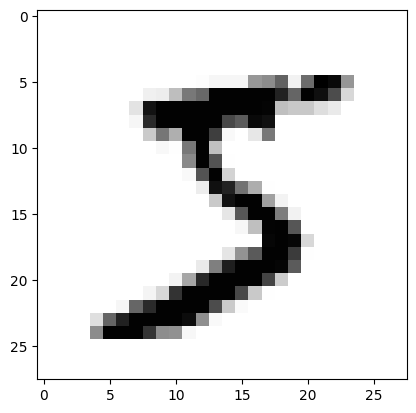

In [4]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

**이미지 인식원리 파악**

In [5]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s"%i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

**차원 변환 과정 실습**

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255

**클래스 값 확인**

In [7]:
print("class : %d" % (y_train[0]))

class : 5


**바이너리 값 확인**

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **2. 딥러닝 기본 프레임 만들기**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**MNIST 데이터 불러오기**

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**차원 변환 후, 테스트셋과 학습셋으로 나눔**

In [11]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

**모델 구조 설정**

In [12]:
model=Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**모델 실행 환결설정**

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**모델 최적화를 위한 구간설정**

In [14]:
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

**모델 실행**

In [15]:
history=model.fit(X_train, y_train, epochs=30, batch_size=200,
                  validation_split=0.25,verbose=0,
                  callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.18493, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18493 to 0.13268, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13268 to 0.10824, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10824 to 0.09545, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09545 to 0.09516, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09516 to 0.08957, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08957 to 0.08515, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08515 to 0.08423, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08423 to 0.08223, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.08223 to 0.08107, saving model to ./MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08107

Epoch 12: val_loss did not improve from 0.08107

Epoch 13: val_loss did not improve from 0.08

**테스트 정확도 출력**

In [16]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9810

 Test Accuracy: 0.9810


**검증셋과 학습셋 오차 저장**

In [17]:
y_vloss = history.history['val_loss']
y_loss= history.history['loss']

**그래프로 표현**

<function matplotlib.pyplot.show(close=None, block=None)>

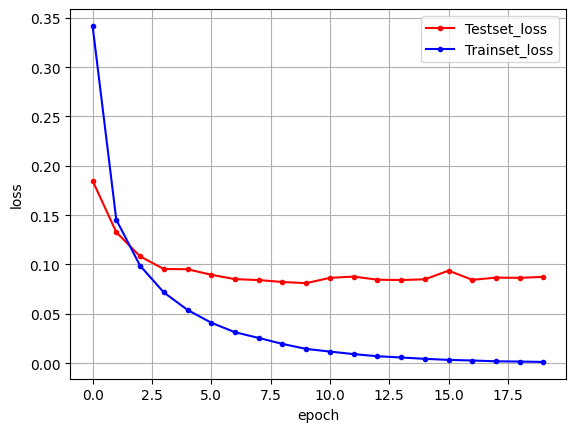

In [18]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid() # 그래프에 그리드 설정
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

# **3. 컨볼루션 신경망 실행**


In [19]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

**데이터 불러오기**

- X_train과 X_test 데이터를 28x28 크기의 4차원 배열로 변환
- 데이터 타입을 float32로 변환
- 모든 픽셀 값을 0과 1 사이로 정규화(0은 검은색, 1은 흰색을 의미)

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train =  X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**컨볼루션 신경망 설정**

- **` model = Sequential()`**: Sequential 모델을 생성합니다. Sequential 모델은 각 레이어를 순차적으로 쌓아서 구성하는 가장 간단한 형태의 신경망 모델입니다.

- **`model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))`**: 첫 번째 컨볼루션 레이어를 추가합니다. 32개의 3x3 크기의 필터를 사용하며, 입력 이미지의 크기는 (28, 28, 1)로 가정합니다. 'relu' 활성화 함수를 사용하여 음수값을 0으로 변환하고 양수값은 그대로 반환합니다.

- **`model.add(Conv2D(64, (3, 3), activation='relu'))`**: 두 번째 컨볼루션 레이어를 추가합니다. 64개의 3x3 크기의 필터를 사용하며, 이전 레이어의 출력을 입력으로 받습니다. 여전히 'relu' 활성화 함수를 사용합니다.

- **`model.add(MaxPooling2D(pool_size=(2,2)))`**: 맥스 풀링(Max Pooling) 레이어를 추가합니다. 2x2 크기의 윈도우로 입력을 스캔하면서 각 윈도우 영역에서 최댓값을 추출하여 이미지의 크기를 절반으로 줄입니다. 이는 공간적인 크기를 줄이고 계산량을 감소시키는 역할을 합니다.

- **`model.add(Dropout(0.25))`**: 드롭아웃(Dropout) 레이어를 추가합니다. 학습 중에 랜덤하게 25%의 뉴런을 무작위로 비활성화하여 과적합(overfitting)을 방지합니다.

- **`model.add(Flatten())`**: 데이터를 1차원으로 펼치는(Flatten) 레이어를 추가합니다. 이전 레이어의 출력을 1차원 배열로 변환하여 다음 완전 연결 레이어에 입력으로 사용됩니다.

- **`model.add(Dense(128, activation='relu'))`**: 완전 연결(Dense) 레이어를 추가합니다. 128개의 뉴런을 가지며, 'relu' 활성화 함수를 사용합니다.

- **`model.add(Dropout(0.5))`**: 드롭아웃(Dropout) 레이어를 추가합니다. 학습 중에 랜덤하게 50%의 뉴런을 무작위로 비활성화하여 과적합을 방지합니다.

- **`model.add(Dense(10, activation='softmax'))`**: 출력 레이어를 추가합니다. 10개의 뉴런을 가지며, 'softmax' 활성화 함수를 사용합니다. 'softmax' 함수는 다중 클래스 분류 문제에서 각 클래스에 속할 확률을 계산합니다.

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


**모델 실행옵션 설정 및 모델 최적화 설정**

**(1) 모델 컴파일:**
  - **`loss='categorical_crossentropy'`**: 모델의 손실 함수를 categorical crossentropy로 설정합니다. 이 손실 함수는 다중 클래스 분류 문제에 적합한 함수입니다. 레이블이 원-핫 인코딩 형태로 제공되어야 합니다.
  - **`optimizer='adam'**: 최적화 알고리즘으로 Adam을 선택합니다. Adam은 경사 하강법의 일종으로서, 모델의 가중치를 업데이트하는 데 사용됩니다.
  - **`metrics=['accuracy']`**: 모델의 성능을 평가할 지표로 'accuracy'(정확도)를 설정합니다. 이는 모델이 올바르게 분류한 샘플의 비율을 나타내는 지표입니다.

**(2) 모델 저장:**
  - **`modelpath="./MNIST_MLP.hdf5"`**: 학습된 모델의 가중치와 구조를 저장할 파일 경로를 지정합니다.
  - **`checkpointer`**: ModelCheckpoint 콜백은 모델 학습 중에 지정된 지표(monitor)를 기준으로 가장 좋은 성능을 보이는 모델을 저장합니다. 여기서는 검증 데이터의 손실(val_loss)을 기준으로 가장 낮은 손실 값을 갖는 모델을 저장합니다. verbose=1은 저장할 때 로그를 출력하라는 의미이며, save_best_only=True는 가장 좋은 성능을 보이는 모델만 저장하라는 의미입니다.

**(3) 조기 종료 콜백:**
   - **`early_stopping_callback`**: EarlyStopping 콜백은 모델 학습 중에 지정된 지표(monitor)를 기준으로 성능 개선이 멈출 때 조기 종료를 수행합니다. 여기서는 검증 데이터의 손실(val_loss)을 기준으로 10번 이상 성능 개선이 없으면 학습을 중지합니다.

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

**모델실행**

In [24]:
history=model.fit(X_train, y_train, epochs=30, batch_size=200,
                  validation_split=0.25,verbose=0,
                  callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.06344, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.06344 to 0.05286, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.05286 to 0.04728, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.04728 to 0.04526, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.04526 to 0.04364, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.04364 to 0.04176, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.04176 to 0.04125, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.04125

Epoch 9: val_loss did not improve from 0.04125

Epoch 10: val_loss improved from 0.04125 to 0.04059, saving model to ./MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.04059

Epoch 12: val_loss did not improve from 0.04059

Epoch 13: val_loss did not improve from 0.04059

Epoch 14: val_loss did not improve from 0.04059

Epoch 15: val_loss did

**테스트 정확도 출력**

In [25]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 9s 28ms/step - loss: 0.0335 - accuracy: 0.9906

 Test Accuracy: 0.9906


**검증셋과 학습셋의 오차 저장**

In [27]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

**그래프로 표현**

<function matplotlib.pyplot.show(close=None, block=None)>

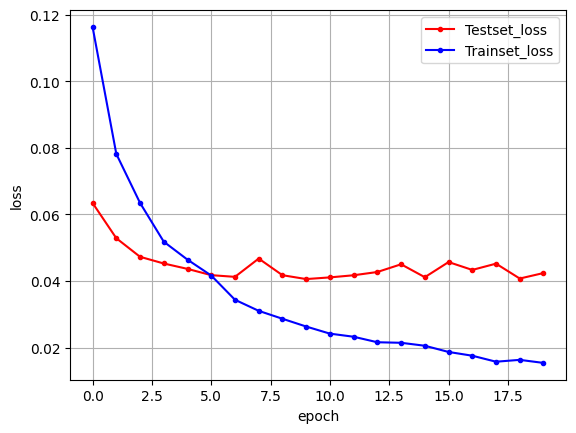

In [28]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid() # 그래프에 그리드 설정
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show